In [62]:
from langchain import PromptTemplate
from langchain.vectorstores import Pinecone
import pinecone
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import PromptTemplate
from langchain.llms import CTransformers

- `from langchain import PromptTemplate`: 
  - Imports the `PromptTemplate` class from the `langchain` library, which is used for creating and managing templates for generating prompts for language models.

- `from langchain.vectorstores import Pinecone`: 
  - Imports the `Pinecone` class from the `vectorstores` module within the `langchain` library, providing an interface to interact with Pinecone's vector database for efficient vector storage and retrieval.

- `import pinecone`: 
  - Imports the `pinecone` library, a vector database service designed for machine learning applications to facilitate scalable and fast search and storage of vector embeddings.

- `from langchain.text_splitter import RecursiveCharacterTextSplitter`: 
  - Imports the `RecursiveCharacterTextSplitter` class from the `text_splitter` module within the `langchain` library, used for splitting texts into smaller segments based on character count in a recursive manner. This is particularly useful for processing large texts that exceed the input limits of language models.

- `from langchain.prompts import PromptTemplate` (repeated import): 
  - This line is a duplicate of the first line and imports the `PromptTemplate` class again. It is redundant and should be removed from the code to avoid unnecessary repetition.

- `from langchain.llms import CTransformers`: 
  - Imports the `CTransformers` class from the `llms` module within the `langchain` library. The `CTransformers` class is designed to work with transformer-based language models, providing functionalities for chaining multiple models or processes together.


In [63]:
from dotenv import load_dotenv
import os

load_dotenv()  # This loads the environment variables from a .env file

PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')
PINECONE_API_ENV = os.getenv('PINECONE_API_ENV')


- `from dotenv import load_dotenv`: 
  - Imports the `load_dotenv` function from the `dotenv` package. This function is used to load environment variables from a `.env` file into the Python script's environment.

- `import os`: 
  - Imports the built-in `os` module, which provides a way of using operating system dependent functionality. The `os` module is commonly used for accessing environment variables, working with file paths, and performing file operations.

- `load_dotenv()`: 
  - Calls the `load_dotenv` function to load the environment variables from a `.env` file located in the same directory as the Python script, or from a custom location if specified. If the `.env` file is not found, this call will fail silently without throwing an error.

- `PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')`: 
  - Retrieves the value of the environment variable `PINECONE_API_KEY` using the `os.getenv` method. The value is stored in the variable `PINECONE_API_KEY`. This environment variable is expected to hold the API key for Pinecone, a vector database service for machine learning applications.

- `PINECONE_API_ENV = os.getenv('PINECONE_API_ENV')`: 
  - Retrieves the value of the environment variable `PINECONE_API_ENV` using the `os.getenv` method. The value is stored in the variable `PINECONE_API_ENV`. This environment variable can be used to specify the environment for the Pinecone service, such as development, testing, or production.


In [64]:
import pandas as pd
def load_csv(file_path):
    df = pd.read_csv(file_path)
    # Extract the first two columns and concatenate them into a single text string per row
    combined_text = df.iloc[:, 0:2].apply(lambda row: ' '.join(row.values.astype(str)), axis=1).tolist()
    return combined_text


- `import pandas as pd`: 
  - Imports the `pandas` library and aliases it as `pd`. Pandas is a powerful data manipulation and analysis library for Python, commonly used for working with tabular data.

- `def load_csv(file_path)`: 
  - Defines a function `load_csv` that takes a single argument `file_path`. This function is designed to read a CSV file from the specified path.

- Inside `load_csv(file_path)`:
  - `df = pd.read_csv(file_path)`: 
    - Reads the CSV file at `file_path` into a pandas DataFrame `df`. A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns).

  - `combined_text = df.iloc[:, 0:2].apply(lambda row: ' '.join(row.values.astype(str)), axis=1).tolist()`:
    - `df.iloc[:, 0:2]` selects the first two columns of the DataFrame `df`.
    - `.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)` applies a function along the axis=1 (rows) of the DataFrame. This function converts the values of each row in the selected columns to strings, joins them with a space (`' '`) to form a single text string, and is applied to each row in the selected columns.
    - `.tolist()` converts the resulting pandas Series of combined text strings into a list, which is then assigned to the variable `combined_text`.

- `return combined_text`:
  - The function returns `combined_text`, which is a list of strings. Each string in the list corresponds to the combined text of the first two columns for each row in the input CSV file.


In [65]:
extracted_pdf=load_csv("dataset/audit_data.csv")

In [66]:
def text_split(text_list):
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=20)
    text_chunks = []
    for text in text_list:
        chunks = text_splitter.split_text(text)  # Assuming this is the correct method
        text_chunks.extend(chunks)
    return text_chunks


- `def text_split(text_list)`: 
  - Defines a function `text_split` that takes a single argument `text_list`, which is expected to be a list of text strings. The function's purpose is to split each text string in this list into smaller chunks.

- Inside `text_split(text_list)`:
  - `text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=20)`:
    - Creates an instance of the `RecursiveCharacterTextSplitter` class with specified `chunk_size` and `chunk_overlap` parameters. This text splitter is configured to split text into chunks of up to 500 characters, with a 20-character overlap between consecutive chunks. The overlap ensures continuity in context or information that might be split across chunk boundaries.

  - `text_chunks = []`:
    - Initializes an empty list `text_chunks` that will be used to store all the text chunks generated from splitting the texts in `text_list`.

  - `for text in text_list`:
    - Starts a loop over each text string in `text_list`.

  - `chunks = text_splitter.split_text(text)`:
    - For each text string in the loop, uses the `text_splitter`'s `split_text` method to split the text into smaller chunks based on the configured `chunk_size` and `chunk_overlap`. The resulting chunks for this particular text string are stored in the variable `chunks`.

  - `text_chunks.extend(chunks)`:
    - Adds the chunks generated from the current text string to the `text_chunks` list. The `extend` method is used to add elements from `chunks` to the end of `text_chunks`, flattening the list of chunks into `text_chunks` instead of nesting lists.

- `return text_chunks`:
  - After all text strings in `text_list` have been processed and their corresponding chunks added to `text_chunks`, the function returns `text_chunks`. This returned value is a list containing the smaller text chunks generated from all the text strings in the initial `text_list`.

This function is particularly useful for preparing large texts for processing by models with character or token limits, ensuring each chunk can be processed individually while maintaining a semblance of context through the overlap.


In [67]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

In [68]:
#download embedding model
def download_hugging_face_embeddings():
    model_name = "BAAI/bge-base-en-v1.5"
    model_kwargs = {"device": "cuda"}
    encode_kwargs = {"normalize_embeddings": True}
    embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs)
    return embeddings


In [69]:
embeddings= download_hugging_face_embeddings()

In [70]:
pinecone.init(api_key=PINECONE_API_KEY, environment=PINECONE_API_ENV)
index = "privacy"
docsearch = Pinecone.from_texts(text_chunks, embeddings, index_name=index)


- **Initialize Pinecone**:
  - `pinecone.init(api_key=PINECONE_API_KEY, environment=PINECONE_API_ENV)`
    - Initializes the Pinecone service with the user's API key (`PINECONE_API_KEY`) and specifies the environment (`PINECONE_API_ENV`). This step is essential for setting up a secure connection to Pinecone's vector database services.

- **Define the Index Name**:
  - `index = "privacy"`
    - Sets up an index named "privacy" in Pinecone. An index in Pinecone serves as a container for storing and querying vectorized data. The choice of "privacy" as the index name suggests a focus on privacy-related data applications.

- **Vectorize Text and Update Index**:
  - `docsearch = Pinecone.from_texts(text_chunks, embeddings, index_name=index)`
    - Utilizes Pinecone's `from_texts` method to convert a list of text chunks (`text_chunks`) into vector embeddings using a specified embeddings model (`embeddings`). These embeddings are then stored or updated in the Pinecone index specified by `index_name=index`, enabling advanced search and similarity operations on the text data.
    - This process transforms textual information into a format that can be semantically searched or compared, leveraging the power of machine learning models to understand and find relevant content based on context and meaning rather than just keyword matches.



In [71]:
docsearch=Pinecone.from_existing_index(index,embeddings)
query = "What common compliance issues are identified in the dataset, and how frequently do they occur?"
docs= docsearch.similarity_search(query,k=3)

print("Results",docs)

Results [Document(page_content='that, we examine a few identified issues of varying severities that need to be brought up and paid\r\nmore attention to. (The findings are categorized in the above table.) Additional information can be\r\nfound in the next subsection, and the detailed discussions are in Section 4.\r\n8/16 PeckShield Audit Report #: 2021-283Public\r\n2.2 Key Findings\r\nOverall, a minor BEP20 compliance issue was found and our detailed checklist can be found in'), Document(page_content='far, we have identiﬁed a list of potential issues: some of them involve subtle corner cases that might\r\nnot be previously thought of, while others refer to unusual interactions among multiple contracts.\r\nFor each uncovered issue, we have therefore developed test cases for reasoning, reproduction, and/or\r\nveriﬁcation. After further analysis and internal discussion, we determined a few issues of varying'), Document(page_content='Informational 0\r\nTotal 7\r\nWe have so far identiﬁed a 

- **Access an Existing Pinecone Index**:
  - `docsearch = Pinecone.from_existing_index(index, embeddings)`
    - This line initializes a `docsearch` object by accessing an existing Pinecone index named `index`, utilizing the `embeddings` model specified. This setup allows for the retrieval and similarity search of vectorized documents within the specified index, leveraging the precomputed embeddings.

- **Define a Query**:
  - `query = "What common compliance issues are identified in the dataset, and how frequently do they occur?"`
    - Sets a query string asking about common compliance issues within the dataset and their frequency. This query is intended to be analyzed and matched against the documents in the Pinecone index to find relevant answers or documents.

- **Perform a Similarity Search**:
  - `docs = docsearch.similarity_search(query, k=3)`
    - Executes a similarity search using the `docsearch` object. It searches for documents that are most similar to the query, limited to the top 3 matches (`k=3`). This function uses the semantic understanding of the embeddings to find documents that best match the query's intent and content.

- **Display Results**:
  - `print("Results", docs)`
    - Prints the results of the similarity search to the console. The variable `docs` contains information about the top 3 documents that were found to be most similar to the input query, potentially including their identifiers, similarity scores, and other relevant metadata.



In [72]:
prompt_template="""
Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Context: {context}
Question: {question}

Only return the helpful answer below
Helpful answer:
"""

In [73]:
PROMPT=PromptTemplate(template=prompt_template, input_variables=["context", "question"])

chain_type_kwargs={"prompt": PROMPT}

In [74]:
model_path = 'model/llama-2-13b-chat.ggmlv3.q4_0.bin'

llm = CTransformers(model=model_path,
                    model_type="llama",
                    config={'max_new_tokens': 512,
                            'temperature': 0.8})


In [75]:
from langchain.chains import RetrievalQA

qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=docsearch.as_retriever(search_kwargs={'k': 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": PROMPT}
)

- **Setup RetrievalQA**:
  - The snippet initializes an instance of the `RetrievalQA` class, which is designed for a retrieval-based question-answering system. This system combines document retrieval and question answering capabilities.

- **Initialize with `from_chain_type` Method**:
  - `qa = RetrievalQA.from_chain_type(...)`
    - This method creates a `RetrievalQA` instance configured with specific components like a language model (`llm`), a retriever (`docsearch.as_retriever(...)`), and other parameters that define how the QA system operates.

- **Components**:
  - **Language Model (`llm`)**: Specifies the language model to use for generating answers. This model is configured separately (as shown in previous code snippets) and passed to the `RetrievalQA` system.
  
  - **Chain Type (`chain_type="stuff"`)**: Indicates the type of QA chain to be used. The term "stuff" is a placeholder and should be replaced with a specific chain type relevant to the system's requirements, defining the interaction pattern between the retriever and the language model.
  
  - **Retriever Configuration**:
    - `retriever=docsearch.as_retriever(search_kwargs={'k': 2})`
      - Converts the `docsearch` object into a retriever suitable for the `RetrievalQA` system, with `search_kwargs={'k': 2}` indicating that the top 2 most relevant documents should be retrieved for each query. This is crucial for fetching contextually relevant documents that the language model will use to generate answers.
  
  - **Return Source Documents (`return_source_documents=True`)**: Configures the system to include the source documents along with the answers in the output. This is useful for verification or further analysis of the information provided in the responses.
  
  - **Chain Type Arguments (`chain_type_kwargs={"prompt": PROMPT}`)**: Allows for additional configuration specific to the chosen `chain_type`. Here, `{"prompt": PROMPT}` specifies a prompt that will be used by the system, which should be defined elsewhere in the code.
  
### Summary:
This code snippet illustrates how to configure a RetrievalQA system using the `RetrievalQA.from_chain_type` method. The setup includes specifying a language model for answer generation, defining a document retriever for sourcing relevant context, and other options to tailor the system's behavior to specific needs, such as returning source documents and customizing prompts.


In [76]:
import pandas as pd

def log_qa_interaction():
    user_input = input("Input Prompt: ")
    result = qa({"query": user_input})
    
    print("Response:", result["result"])
    
    chunks_text = []  
    
    if 'source_documents' in result:
        print("\nSelected Chunks for Summarization:")
        for idx, doc in enumerate(result['source_documents'], start=1):
            document_text = getattr(doc, 'page_content', "Attribute 'page_content' not found")
            print(f"Chunk {idx}: {document_text}")
            chunks_text.append(document_text) 
    

    append_to_csv(user_input, result["result"], chunks_text)

def append_to_csv(question, answer, chunks, file_path='QA_log.csv'):
    new_data = pd.DataFrame({
        'Question': [question], 
        'Answer': [answer],
        **{f'Chunk {i+1}': [chunks[i] if i < len(chunks) else ''] for i in range(2)}
    })
    
    try:
        existing_data = pd.read_csv(file_path)
        updated_data = pd.concat([existing_data, new_data], ignore_index=True)
    except FileNotFoundError:
        updated_data = new_data
    
    updated_data.to_csv(file_path, index=False)

log_qa_interaction()


Response: According to the scan results, the most common security vulnerabilities identified across the smart contracts are:

1. Reentrancy
2. Ownership Takeover
3. Timestamp Dependence
4. Gas Limit and Loops
5. Transaction -Ordering Dependence
6. Unchecked external call
7. Unchecked math
8. Unsafe type inference.

Selected Chunks for Summarization:
Chunk 1: www.hacken.io  
We have scanned this smart contract for commonly known and 
more specific vulnerabilities. Here are some of the commonly 
known vulnerabilities that are considered:  
Category  Check Item  
Code review  ▪ Reentrancy  
▪ Ownership Takeover  
▪ Timestamp Dependence  
▪ Gas Limit and Loops  
▪ Transaction -Ordering Dependence  
▪ Style guide violation  
▪ EIP standards violation  
▪ Unchecked external call  
▪ Unchecked math  
▪ Unsafe type inference
Chunk 2: www.hacken.io  
We have scanned this smart contract for commonly known and 
more specific vulnerabilities. Here are some of the commonly 
known vulnerabilities th

C:\Users\navi\AppData\Local\Temp\ipykernel_43852\672482719.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  similarities_df = pd.concat([similarities_df, new_row_df], ignore_index=True)


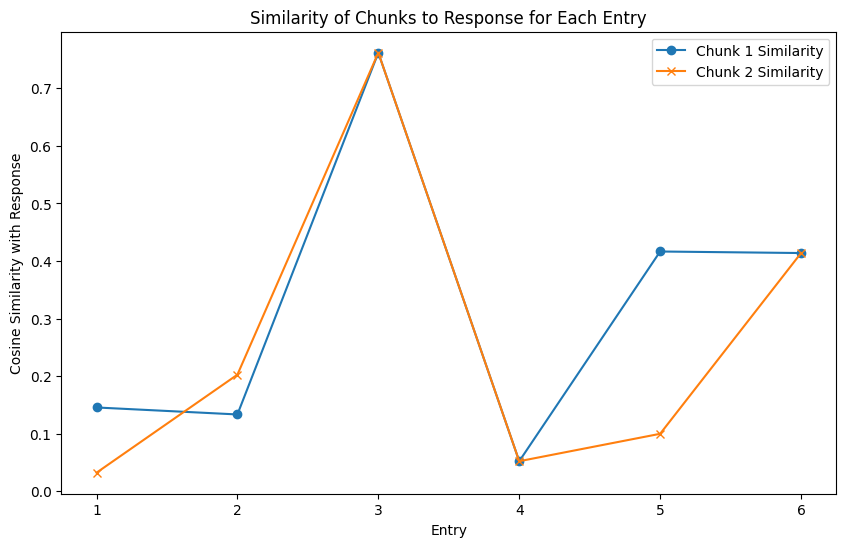

In [78]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


df = pd.read_csv('QA_log.csv')


similarities_df = pd.DataFrame(columns=['Entry', 'Chunk 1 Similarity', 'Chunk 2 Similarity'])


vectorizer = TfidfVectorizer()

for index, row in df.iterrows():
    response = row['Answer']
    chunk1 = row['Chunk 1']
    chunk2 = row['Chunk 2']
    

    combined_texts = [response, chunk1, chunk2]
    

    tfidf_matrix = vectorizer.fit_transform(combined_texts)

    similarity_chunk1 = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    similarity_chunk2 = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[2:3])[0][0]
    
    new_row = {'Entry': index + 1, 'Chunk 1 Similarity': similarity_chunk1, 'Chunk 2 Similarity': similarity_chunk2}
    new_row_df = pd.DataFrame([new_row])
    
    similarities_df = pd.concat([similarities_df, new_row_df], ignore_index=True)

plt.figure(figsize=(10, 6))
plt.plot(similarities_df['Entry'], similarities_df['Chunk 1 Similarity'], label='Chunk 1 Similarity', marker='o')
plt.plot(similarities_df['Entry'], similarities_df['Chunk 2 Similarity'], label='Chunk 2 Similarity', marker='x')
plt.xlabel('Entry')
plt.ylabel('Cosine Similarity with Response')
plt.title('Similarity of Chunks to Response for Each Entry')
plt.legend()
plt.xticks(range(1, len(similarities_df) + 1))
plt.show()


## BAAI General Embeddings (BGE) Model

### Model Identifier
- **Name**: `BAAI/bge-base-en-v1.5`

### Organization
- **Developed by**: Beijing Academy of Artificial Intelligence (BAAI)

### Model Details
- **Type**: Base General Embeddings Model for English
- **Version**: 1.5

### Purpose and Applications
- Designed to provide semantic vector representations of English text, this model is a versatile tool for a wide range of Natural Language Processing (NLP) tasks including, but not limited to:
  - Text Similarity Analysis
  - Text Classification

### Key Features
- **Semantic Understanding**: Captures the nuances and semantic relationships within English text.
- **Versatile Applications**: Suitable for various NLP tasks, enhancing the capability of applications to understand and process English language effectively.

### Risks, Attacks, and Bias
- **Data Bias**: Embedding models can inherit and amplify biases present in their training data, potentially leading to skewed or unfair outcomes.
- **Adversarial Attacks**: Models might be vulnerable to adversarial attacks, where slightly altered input can lead to significantly different outputs, undermining model reliability.
- **Privacy Risks**: If trained on sensitive data, embeddings might inadvertently reveal personal information.

### Overcoming Challenges
- **Bias Mitigation**: Employ bias detection and mitigation strategies during model training and before deployment. Regularly update models with more diverse and representative training data.
- **Robustness Testing**: Implement adversarial testing and robustness checks to identify and mitigate vulnerabilities to attacks.
- **Privacy Preservation**: Use techniques such as differential privacy during training to minimize the risk of exposing sensitive information through the model's outputs.

### Use Case
Ideal for developers and researchers working on projects that require deep understanding of text data, such as recommendation systems, content categorization, and sentiment analysis.

### Conclusion
While `BAAI/bge-base-en-v1.5` offers advanced capabilities for processing and understanding English text, awareness and proactive measures are essential to address its potential biases, vulnerabilities, and ethical considerations. Through continuous improvement and adherence to best practices in AI ethics and security, users can harness the power of this model while minimizing risks.


## llama2 13B LLM Modal card



- **Model Path**: `model/llama-2-13b-chat.ggmlv3.q4_0.bin`
  - **Details**: Specifies the file path to the LLaMA model, indicating a specific version optimized for chat functionalities.

- **Model Instantiation**:
  - `llm = CTransformers(model=model_path, model_type="llama", config={'max_new_tokens': 512, 'temperature': 0.8})`
    - **Class Used**: Utilizes `CTransformers` for initializing the LLaMA model, emphasizing its application for natural language tasks.

- **Configuration Parameters**:
  - `max_new_tokens`: 512
    - Controls the maximum length of generated text to ensure concise and relevant outputs.
  - `temperature`: 0.8
    - Influences the variability of the model's responses, with 0.8 aiming for a balance between creativity and accuracy.

### Key Features:
- **Advanced Text Generation**: Leverages the LLaMA model for producing contextually appropriate, high-quality text.
- **Customizable Outputs**: Offers flexibility in adjusting response generation to meet specific needs through configurable parameters.

### Use Cases:
Ideal for integrating into conversational AI platforms, customer support bots, and any application requiring nuanced, human-like text generation.

### Risks Specific to LLaMA 2 Model:

- **Amplification of Pre-existing Biases**: The LLaMA 2 model, like other large language models, is trained on vast datasets derived from the internet and other sources. These datasets can contain biases, stereotypes, and inaccuracies which the model may inadvertently learn and amplify in its outputs. This includes biases related to gender, race, ethnicity, and more.

- **Generation of Misinformation**: Given its ability to generate convincing text, LLaMA 2 poses a risk of creating and spreading misinformation or disinformation if not carefully monitored and controlled. This can be particularly concerning in contexts like news generation, educational content, or public information dissemination.

- **Privacy Concerns**: The model could potentially generate outputs that include or infer private, sensitive, or identifiable information based on its training data. This risk necessitates stringent data handling and privacy measures.

- **Dependency and Overreliance**: Overreliance on the LLaMA 2 model for decision-making or content creation could lead to a degradation of human expertise and critical thinking skills. It's crucial to maintain a balance between automated outputs and human judgment.

- **Exposure to Malicious Inputs**: Large language models like LLaMA 2 can be vulnerable to specially crafted inputs designed to manipulate the model's outputs. Attackers might exploit this by feeding the model with misleading context or questions, aiming to extract sensitive information embedded in the model's parameters or to generate harmful content.

- **Data Poisoning and Model Inversion Attacks**: LLaMA 2, being trained on vast datasets, might inadvertently learn from maliciously crafted data, leading to biased or inappropriate outputs. Model inversion attacks, where attackers infer sensitive training data information, are a concern for any model that has not been explicitly secured against such vulnerabilities.

- **Automated Propagation of Misinformation**: Given its capacity for generating convincing text, LLaMA 2 could be used to create and spread misinformation at scale, posing significant challenges to information integrity and trust online.


### Strategies for Mitigating LLaMA 2 Specific Risks:

- **Bias Mitigation and Fairness**: Regularly perform bias audits and fairness assessments on the model's outputs. Employ techniques like data augmentation, bias correction, and fine-tuning with balanced datasets to minimize biases.

- **Content Moderation and Fact-Checking**: Implement robust content moderation systems and fact-checking protocols, especially for applications involving content generation for public consumption. This helps prevent the spread of misinformation.

- **Privacy Protection Measures**: Ensure that any data used for training or fine-tuning the model adheres to privacy laws and guidelines. Techniques like differential privacy or data anonymization can be employed to protect individuals' information.

- **Complementary Human Oversight**: Establish systems for human oversight and review of the model's outputs, especially in critical applications. Encourage a complementary approach where the model assists human decision-making rather than replacing it.

- **Robust Input Validation and Filtering**: Implementing advanced mechanisms to detect and neutralize malicious inputs can protect LLaMA 2 from being exploited for generating harmful content or revealing sensitive information.

- **Differential Privacy and Federated Learning**: To mitigate risks associated with data poisoning and model inversion attacks, employing training techniques like differential privacy, which adds noise to the training data, and federated learning, which trains models on decentralized data, can enhance security.

- **Content Monitoring and Misinformation Mitigation**: Developing systems to monitor the content generated by LLaMA 2 for signs of misinformation and employing fact-checking protocols can help curb the spread of false information.

- **Ethical and Transparent Model Development**: Engaging in ethical model development practices, including transparency about the model's training data and limitations, can foster trust and responsible use. Ongoing research into the model's potential biases and vulnerabilities is essential for timely mitigation strategies.

### Conclusion:
The LLaMA 2 model, while offering advanced capabilities for natural language understanding and generation, comes with specific risks and potential for misuse. Addressing these challenges requires a multi-faceted approach, combining technical safeguards, ethical guidelines, and continuous vigilance to ensure its benefits are maximized while minimizing harm.
